<a href="https://colab.research.google.com/github/coretail/housing-analysis/blob/main/Housing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.dummy import DummyClassifier, DummyRegressor
from google.colab import drive
from google.colab import auth
from google.colab import files

In [79]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
file = '/content/drive/My Drive/housing.csv'
df = pd.read_csv(file)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [81]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [83]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

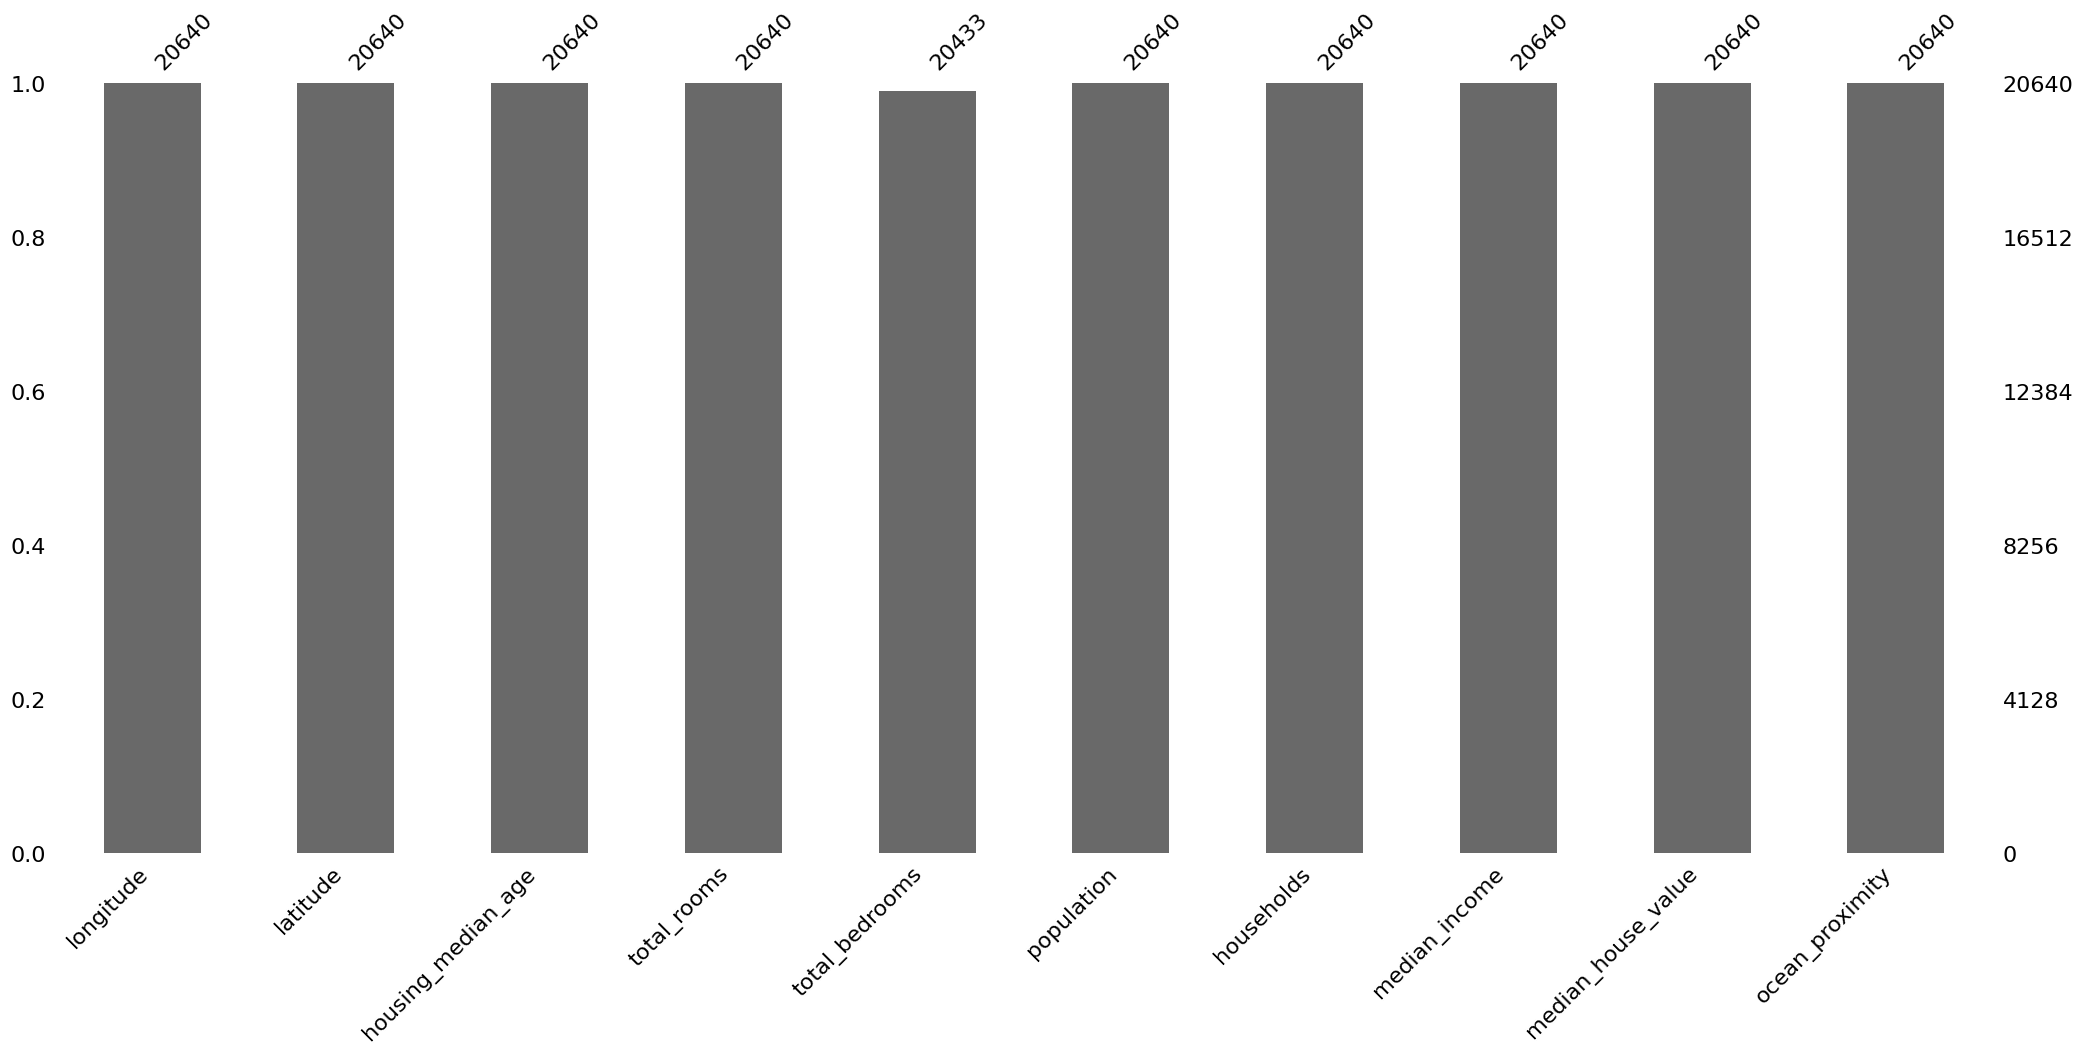

In [84]:
msno.bar(df)

<Axes: >

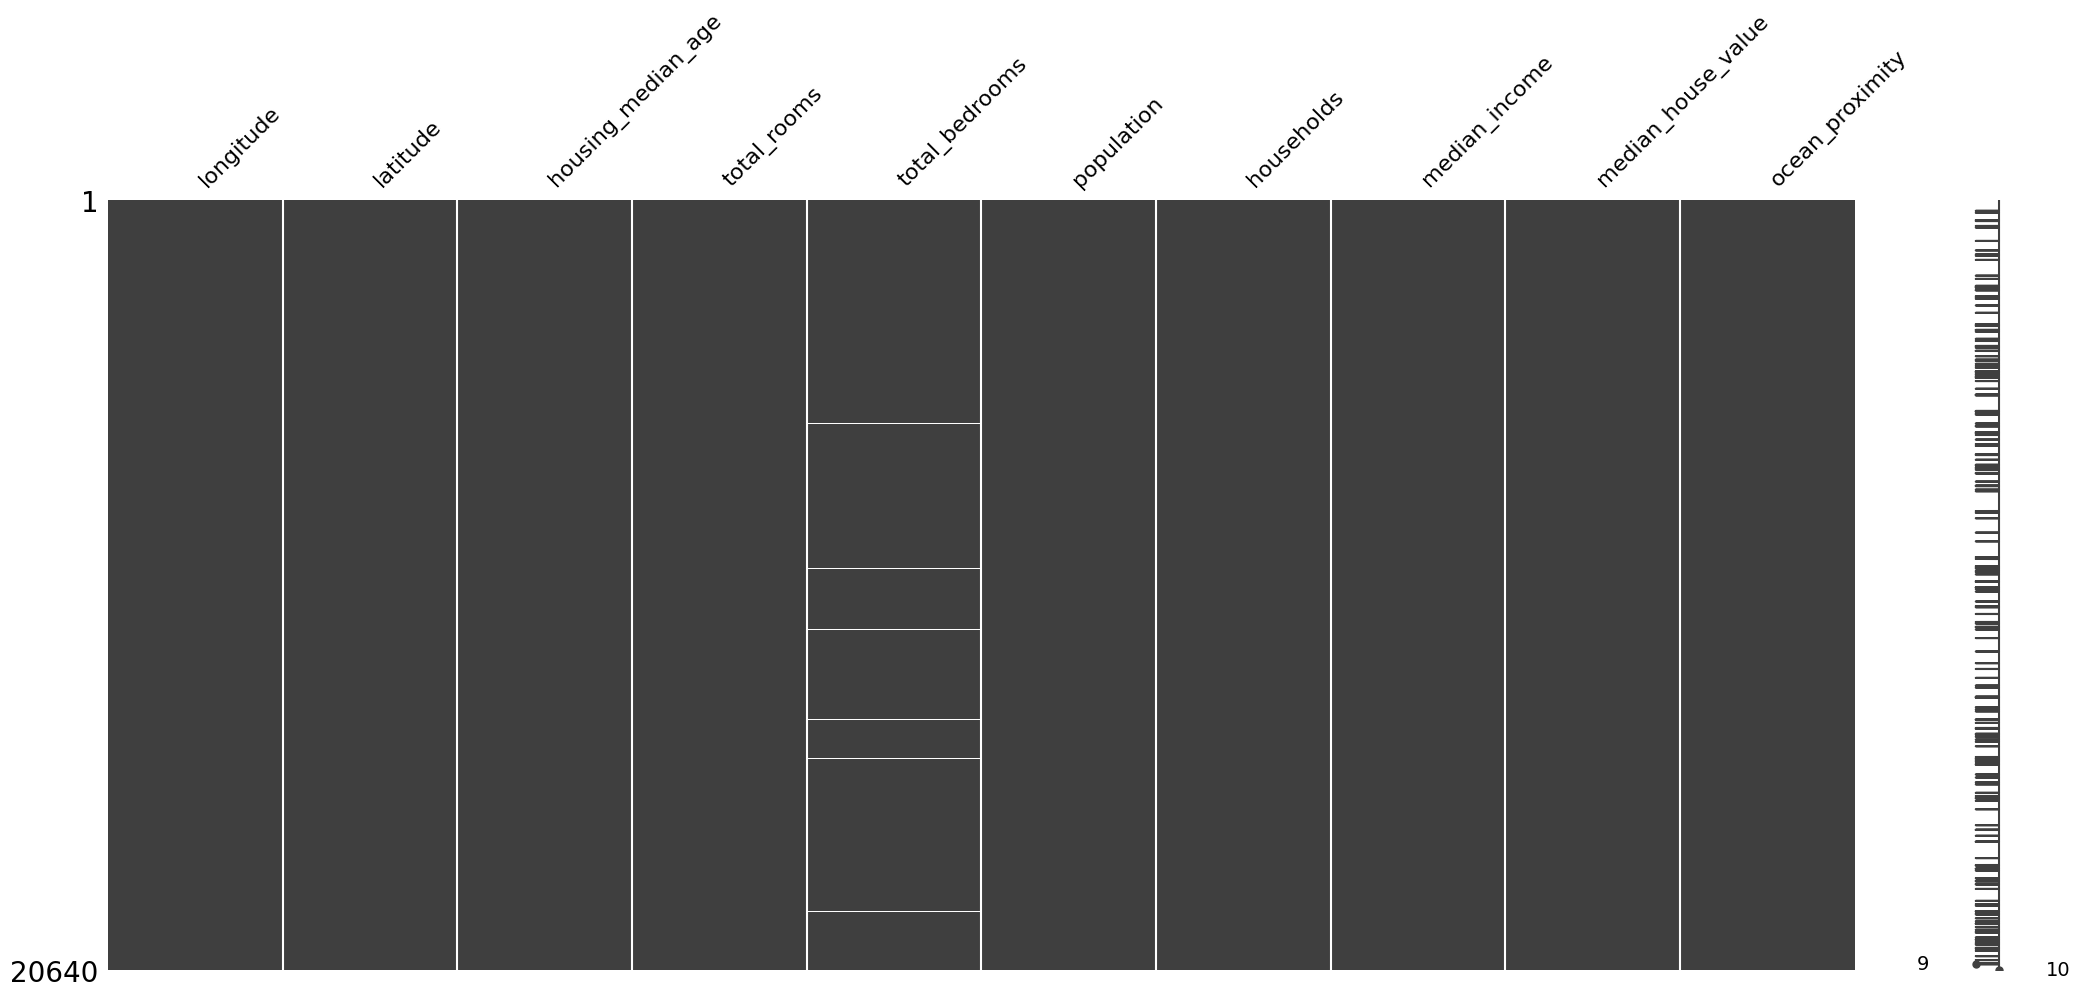

In [85]:
msno.matrix(df)

In [86]:
df.dropna(inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [88]:
#search unique value
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [89]:
#Encoding ocean_proximity
oceanProximityEncoded = pd.get_dummies(df.ocean_proximity)

In [90]:
oceanProximityEncoded

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [91]:
df.join(oceanProximityEncoded)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [92]:
enc = preprocessing.OneHotEncoder()

In [93]:
enc.fit(df.ocean_proximity.unique().reshape(-1,1))

OneHotEncoder()

In [94]:
enc.transform(df.ocean_proximity.unique().reshape(-1,1)).toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

In [95]:
transformed = enc.transform(df[['ocean_proximity']]).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [96]:
arr = np.array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

enc.inverse_transform(arr)

array([['NEAR BAY'],
       ['<1H OCEAN'],
       ['INLAND'],
       ['NEAR OCEAN'],
       ['ISLAND']], dtype=object)

In [97]:
enc.get_feature_names_out()

array(['x0_<1H OCEAN', 'x0_INLAND', 'x0_ISLAND', 'x0_NEAR BAY',
       'x0_NEAR OCEAN'], dtype=object)

In [98]:
enc.transform(df.ocean_proximity.unique().reshape(-1,1))

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [99]:
oceanProximity = enc.transform(df[['ocean_proximity']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [100]:
enc = preprocessing.OrdinalEncoder().fit(df.ocean_proximity.unique().reshape(-1,1))

In [101]:
enc.transform(df.ocean_proximity.unique().reshape(-1,1))

array([[3.],
       [0.],
       [1.],
       [4.],
       [2.]])

In [102]:
op = enc.transform(df[['ocean_proximity']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(


In [103]:
op_df = pd.DataFrame(op, columns=enc.get_feature_names_out(['ocean_proximities']))
df = pd.concat([df, op_df], axis=1)

In [104]:
df.drop(['ocean_proximity'], axis=1, inplace=True)

In [105]:
df.dropna(inplace=True)

In [106]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximities
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0
...,...,...,...,...,...,...,...,...,...,...
20428,-118.83,34.23,6.0,8803.0,1114.0,3385.0,1010.0,8.7288,425800.0,1.0
20429,-118.84,34.22,11.0,3170.0,420.0,1418.0,432.0,7.5118,361900.0,1.0
20430,-118.84,34.21,16.0,4975.0,949.0,2537.0,971.0,5.2361,224700.0,1.0
20431,-118.80,34.21,16.0,1466.0,196.0,661.0,209.0,6.2893,282700.0,1.0


In [107]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximities
count,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000
mean,-119.559944,35.616987,28.679603,2633.266017,537.631699,1423.373294,499.053144,3.873070,207325.175598,1.167985
std,2.005949,2.129656,12.603413,2177.797034,420.586318,1129.606307,381.241066,1.900788,115579.393944,1.420269
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.750000,280.000000,2.565425,120000.000000,0.000000
50%,-118.470000,34.240000,29.000000,2126.000000,435.000000,1166.000000,409.000000,3.538750,179900.000000,1.000000
75%,-118.000000,37.700000,37.000000,3139.000000,647.000000,1721.250000,603.000000,4.743775,265500.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


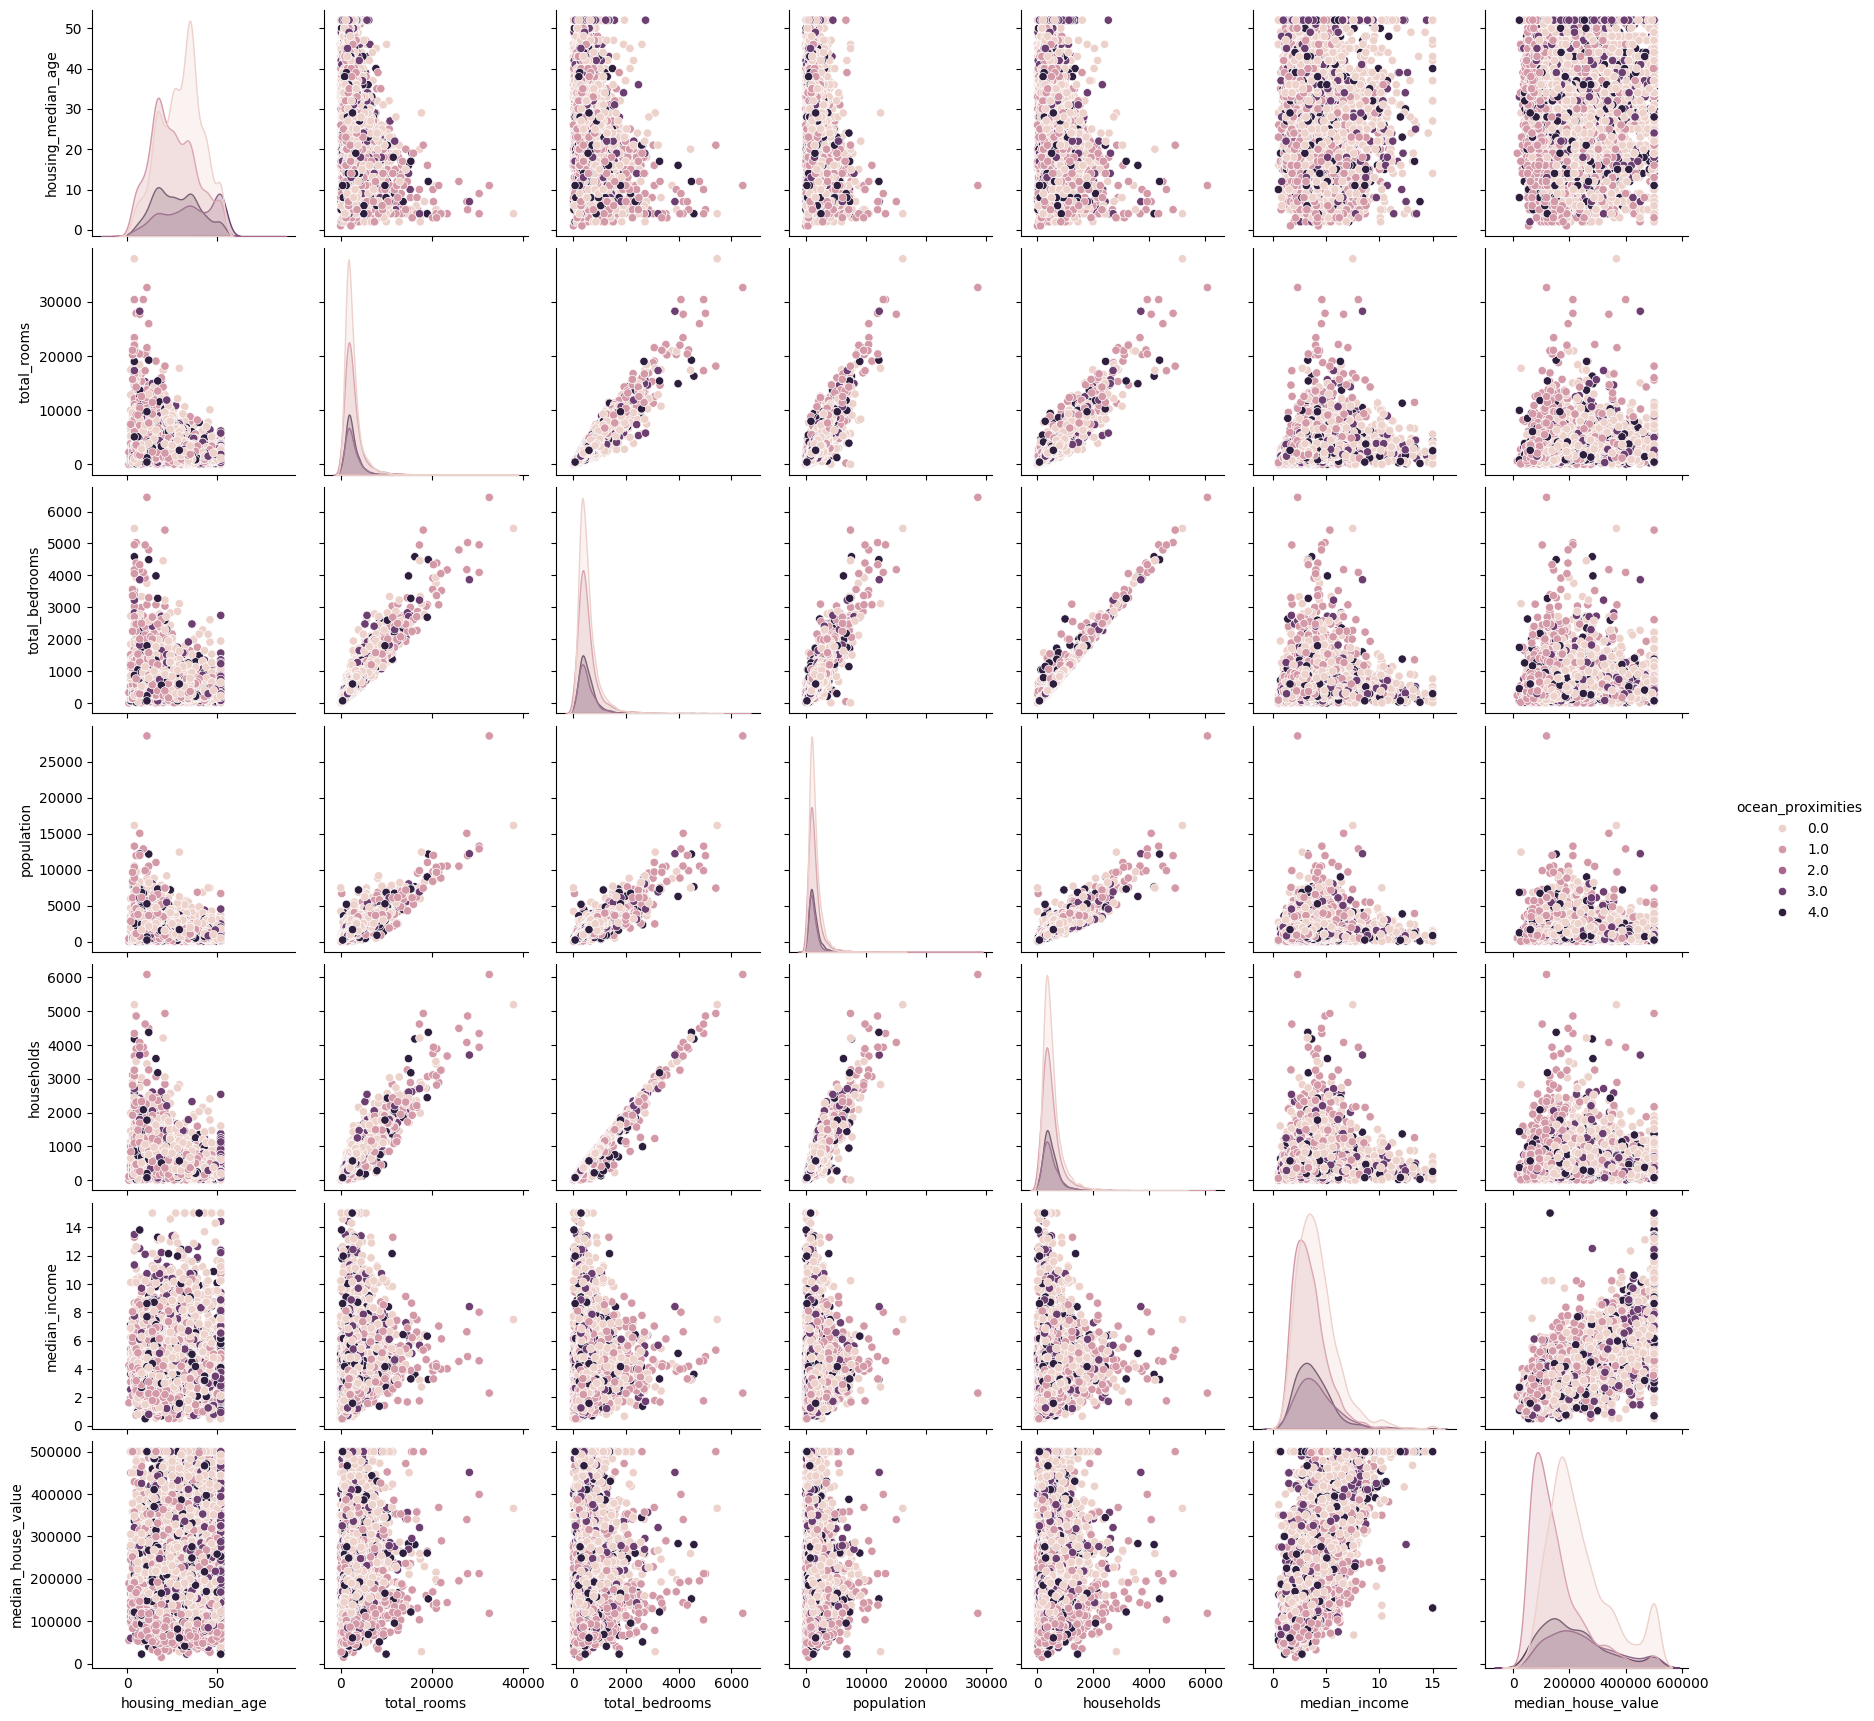

In [108]:
sns.pairplot(df.sample(10000).drop(['latitude', 'longitude'], axis=1), hue='ocean_proximities')

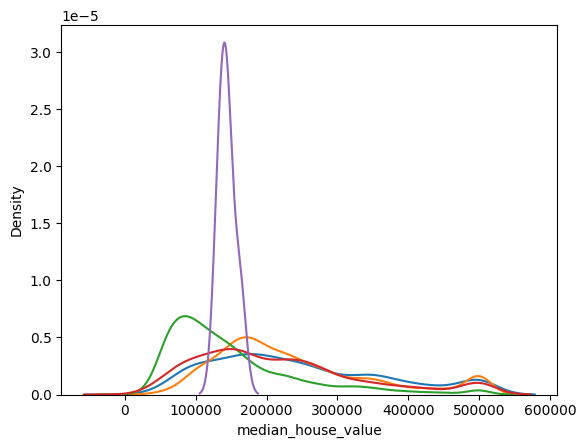

In [109]:
for cls in df.ocean_proximities.unique():
  sns.kdeplot(df[df.ocean_proximities==cls].median_house_value, label=cls)

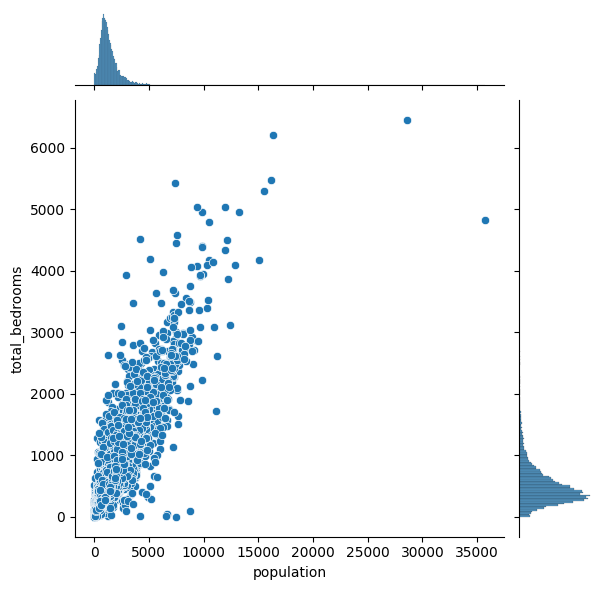

In [110]:
sns.jointplot(x='population', y='total_bedrooms', data=df)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20228 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20228 non-null  float64
 1   latitude            20228 non-null  float64
 2   housing_median_age  20228 non-null  float64
 3   total_rooms         20228 non-null  float64
 4   total_bedrooms      20228 non-null  float64
 5   population          20228 non-null  float64
 6   households          20228 non-null  float64
 7   median_income       20228 non-null  float64
 8   median_house_value  20228 non-null  float64
 9   ocean_proximities   20228 non-null  float64
dtypes: float64(10)
memory usage: 1.7 MB


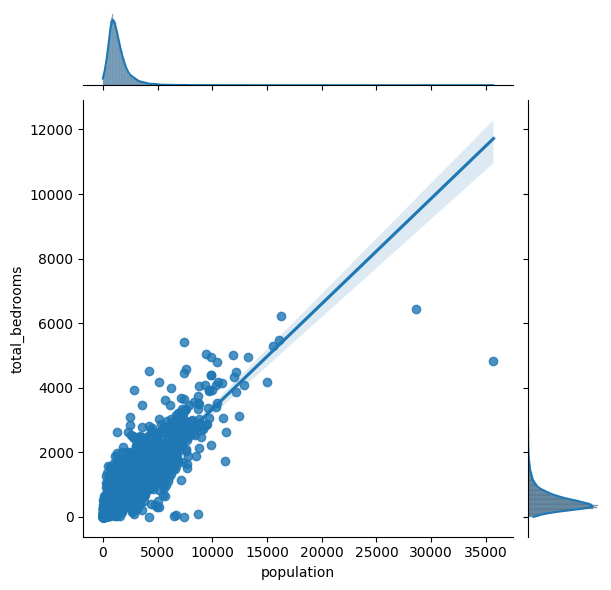

In [112]:
sns.jointplot(x='population', y='total_bedrooms', data=df, kind='reg')

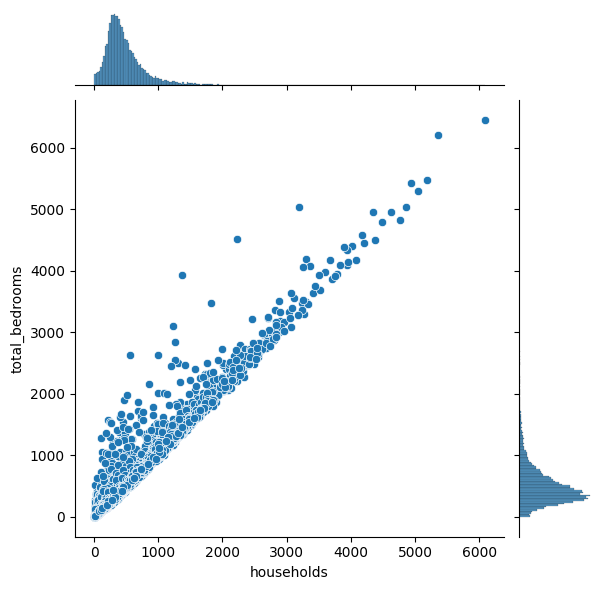

In [113]:
sns.jointplot(x='households', y='total_bedrooms', data=df)

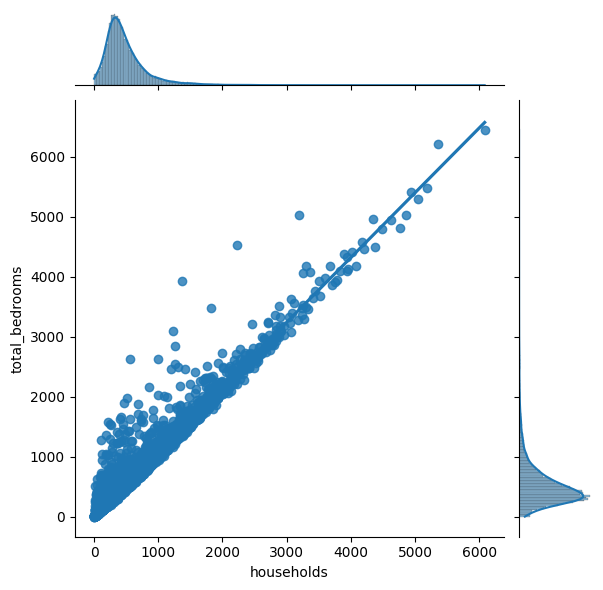

In [114]:
sns.jointplot(x='households', y='total_bedrooms', data=df, kind='reg')

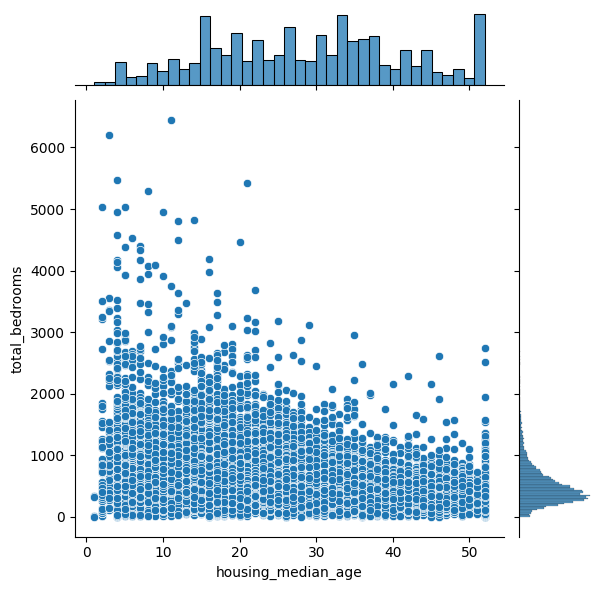

In [115]:
sns.jointplot(x='housing_median_age', y='total_bedrooms', data=df)

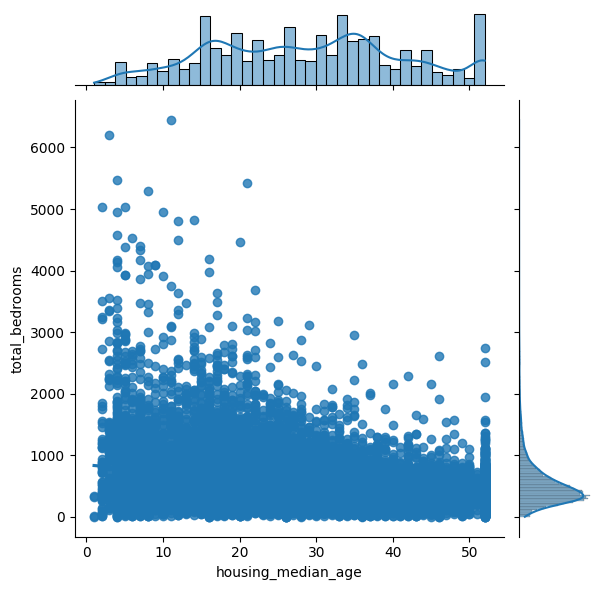

In [116]:
sns.jointplot(x='housing_median_age', y='total_bedrooms', data=df, kind='reg')

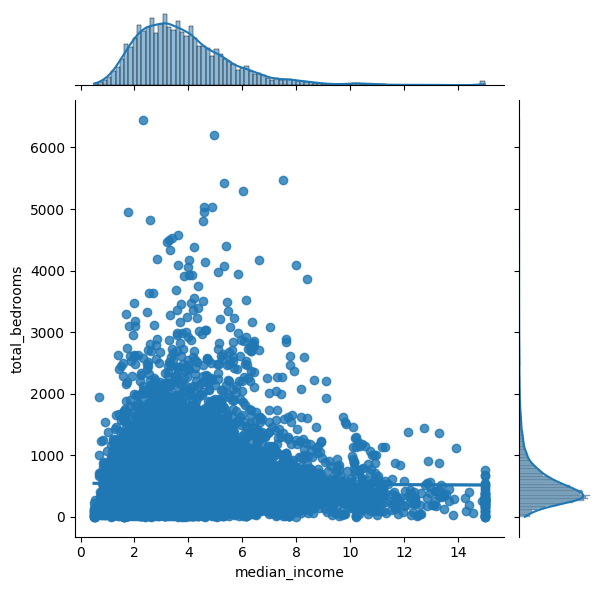

In [117]:
sns.jointplot(x='median_income', y='total_bedrooms', data=df, kind='reg')

<Axes: >

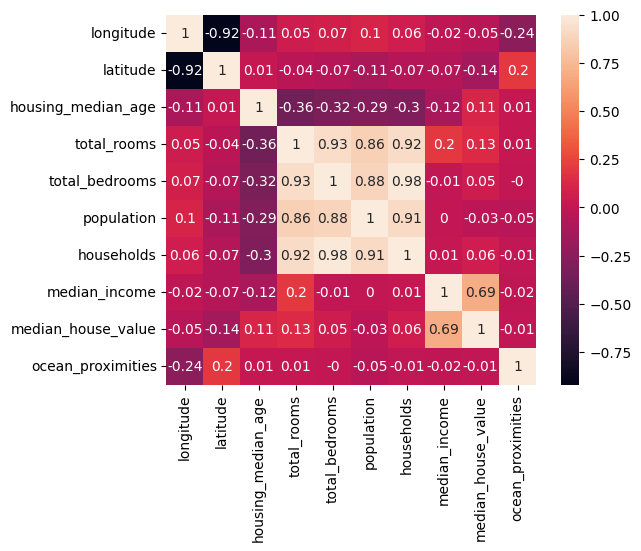

In [118]:
#see correlation
sns.heatmap(df.corr().round(2), square=True, annot=True)

<Axes: >

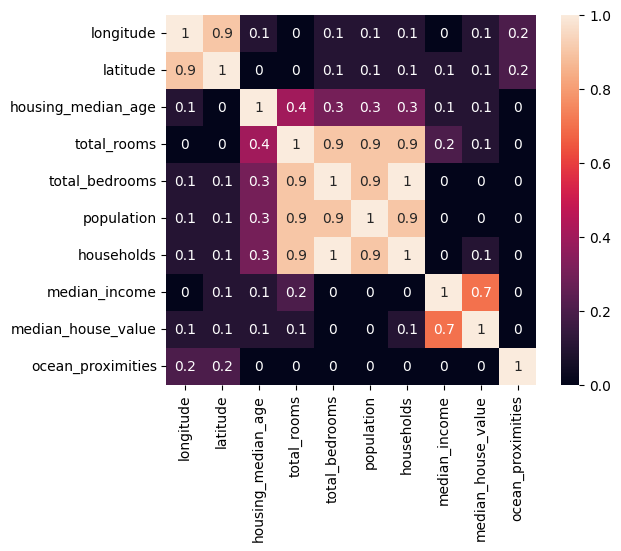

In [119]:
sns.heatmap(df.corr().abs().round(1), square=True, annot=True)

In [120]:
df.groupby('ocean_proximities').describe()

longitude                                                 \
                      count        mean       std     min     25%      50%   
ocean_proximities                                                            
0.0                  8925.0 -118.858927  1.531819 -124.23 -118.54 -118.270   
1.0                  6440.0 -119.886005  2.023066 -124.35 -121.47 -119.945   
2.0                     5.0 -118.198000  0.004472 -118.20 -118.20 -118.200   
3.0                  2256.0 -121.795993  1.361887 -122.65 -122.33 -122.210   
4.0                  2602.0 -119.221368  2.257556 -124.30 -121.62 -118.250   

                                  latitude             ... median_income  \
                      75%     max    count       mean  ...           75%   
ocean_proximities                                      ...                 
0.0               -118.01 -116.83   8925.0  34.643971  ...      5.034600   
1.0               -117.99 -114.49   6440.0  36.572522  ...      4.215650   
2.0               -118.20 -118.19      5.0  33.772000  ...      1.979700   
3.0               -122.04 -116.20   2256.0  37.466809  ...      5.085025   
4.0               -117.13 -114.31   2602.0  34.989224  ...      4.770075   

                           median_house_value                                \
                       max              count           mean            std   
ocean_proximities                                                             
0.0                15.0001             8925.0  237081.196751  111991.291956   
1.0                15.0001             6440.0  149766.487888   93594.279932   
2.0                 2.3305                5.0  144180.000000   11714.392857   
3.0                15.0001             2256.0  243869.925089  122507.197167   
4.0                15.0001             2602.0  216155.395081  116920.408333   

                                                                     
                        min       25%       50%       75%       max  
ocean_proximities                                                    
0.0                 14999.0  157900.0  208900.0  289600.0  500001.0  
1.0                 14999.0   84600.0  122500.0  183625.0  500001.0  
2.0                131300.0  137500.0  143800.0  145800.0  162500.0  
3.0                 22500.0  150000.0  218800.0  331825.0  500001.0  
4.0                 14999.0  129725.0  191500.0  274950.0  500001.0  

[5 rows x 72 columns]

In [121]:
#0 = <1HR OCEAN
#1 = INLAND
#2 = ISLAND
#3 = NEAR BAY
#4 = NEAR OCEAN

In [122]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['longitude', 'latitude', 'ocean_proximities', 'median_house_value'], axis=1),
                                                    df.median_house_value, test_size = .5, stratify=df.ocean_proximities)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.5)

In [123]:
model = RandomForestRegressor().fit(x_train, y_train)

In [124]:
model.score(x_val, y_val)

0.6745007427862844

In [125]:
#cross validation
cross_val_score(model, x_val, y_val)

array([0.65924544, 0.62987917, 0.65856836, 0.62414603, 0.66255234])

In [126]:
cross_val_predict(model, x_val, y_val)

array([167675.  , 170661.02, 206629.11, ..., 188570.03, 264236.  ,
       161376.  ])

In [127]:
dummy = DummyRegressor(strategy='mean')

In [128]:
dummy.fit(x_train, y_train)

DummyRegressor()

In [129]:
dummy.score(x_val, y_val)

-0.0002465759669865175

In [130]:
dummy = DummyClassifier(strategy='prior')

In [131]:
dummy.fit(x_train, y_train)

DummyClassifier()

In [132]:
dummy.score(x_val, y_val)

0.044690527981016415

In [133]:
#the error indicates that on the last index the data is not enough for scoring a model
#0 = <1HR OCEAN
#1 = INLAND
#2 = ISLAND
#3 = NEAR BAY
#4 = NEAR OCEAN


In [134]:
for cls in df.ocean_proximities.unique():
    df_index = df[df.ocean_proximities.isin([cls])].index
    idx = df_index.intersection(x_val.index)
    idx_test = x_test.index.intersection(df_index)

    print(str(cls) + ' :')

    try:
        print('val score :')
        val_score = model.score(x_val.loc[idx, :], y_val.loc[idx])
        print(val_score)
    except Exception as e:
        print(f"Error calculating validation score: {e}")

    try:
        print('test score :')
        test_score = model.score(x_test.loc[idx_test, :], y_test.loc[idx_test])
        print(test_score)
    except Exception as e:
        print(f"Error calculating test score: {e}")

    print('\n')

    #no 2 or ISLAND house is too few to be scored

3.0 :
val score :
0.7097076562705976
test score :
0.6564188154076669


0.0 :
val score :
0.6396885663348993
test score :
0.6091393502720376


1.0 :
val score :
0.5608676401344062
test score :
0.5119226283696958


4.0 :
val score :
0.6489190511965923
test score :
0.6307986287820497


2.0 :
val score :
nan
test score :
-420.5277112403799




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Text(0, 0.5, 'Median House Value')

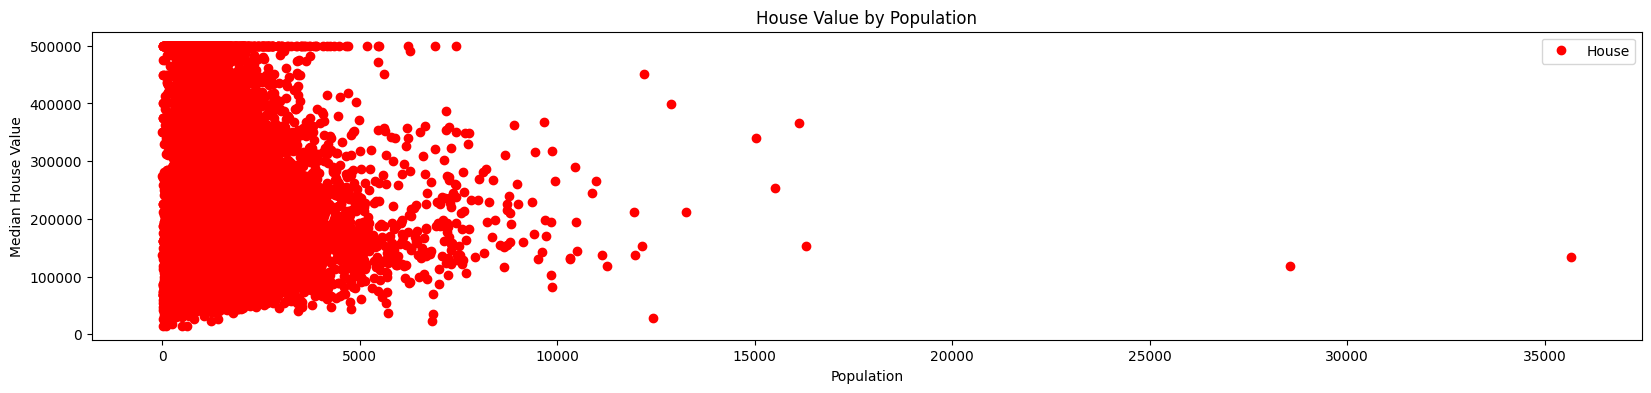

In [135]:
#try simple visualization
plt.figure(figsize=(20,4))
plt.plot(df.population, df.median_house_value, 'ro', label='House')
plt.legend()
plt.title('House Value by Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')

Text(0, 0.5, 'Ocean Proximity')

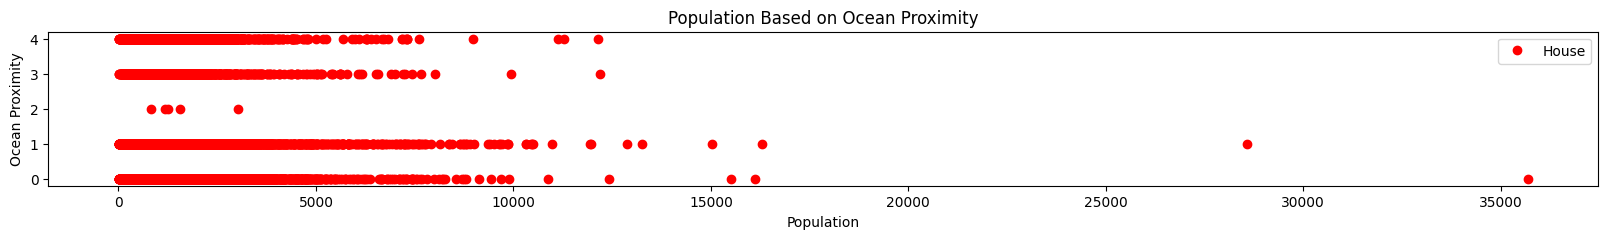

In [136]:
plt.figure(figsize=(20,2))
plt.plot(df.population, df.ocean_proximities, 'ro', label='House')
plt.legend()
plt.title('Population Based on Ocean Proximity')
plt.xlabel('Population')
plt.ylabel('Ocean Proximity')